In [1]:
import pympute
from sys import path
import cudf
import cupy as cp



path.insert(0, '../')  # Ensure pympute is importable if installed locally


print(pympute.__file__)

GPU functionality is not available!


ModuleNotFoundError: No module named 'cudf'

In [18]:
import pandas as pd
import os
import json
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
#from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from src.data_pipeline import drop_mostly_empty_columns

#read in the data
filename = 'form_1_cleaned_v2.csv'

filepath = os.path.join('..', 'Database', 'processed', filename)

df = pd.read_csv(filepath)

#identify columns with mixed data types
mixed_cols = []

for col in df.columns:
    types = df[col].map(type).nunique()
    if types > 1:
        print(f"{col} has mixed types")
        mixed_cols.append(col)

df = df.drop(columns=mixed_cols)

df.astype(float)

df, dropped_cols = drop_mostly_empty_columns(df, threshold=0.85)

C:\Users\benol\AppData\Local\Temp\ipykernel_58544\3159603941.py:14: DtypeWarning: Columns (371,372,373) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


DeathCause1 has mixed types
DeathCause2 has mixed types
DeathECode has mixed types


In [ ]:

#df.drop(columns=['DeathCause1', 'DeathCause2', 'DeathECode'])

#preprocessing pipeline
# ordinal_pipeline = make_pipeline(
#     #SimpleImputer(strategy='most_frequent'),
#     OrdinalEncoder()
# )

# categorical_pipeline = make_pipeline(
#     #SimpleImputer(strategy='most_frequent'),
#     OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# )

# numerical_pipeline = make_pipeline(
#     #SimpleImputer(strategy='mean'),
#     StandardScaler()
# )

# dict_path = os.path.join('..','Database', 'processed', 'form_1_column_dict.json')

# with open(dict_path, 'r') as file:
#     form_1_column_dict = json.load(file)

# ordinal_col = form_1_column_dict['ordinal_col']
# nominal_col = form_1_column_dict['nominal_col']
# continuous_col = form_1_column_dict['continuous_col']
# #continuous_col.remove('Mod1Id')

# #preprocess
# df_encoded = preprocess_df(
#     df,
#     ordinal_col,
#     nominal_col,
#     continuous_col,
#     ordinal_pipeline,
#     categorical_pipeline,
#     numerical_pipeline,
#     threshold=0.8
#     )

# #check feature expansion
# print(df_encoded.shape)

(19560, 5452)


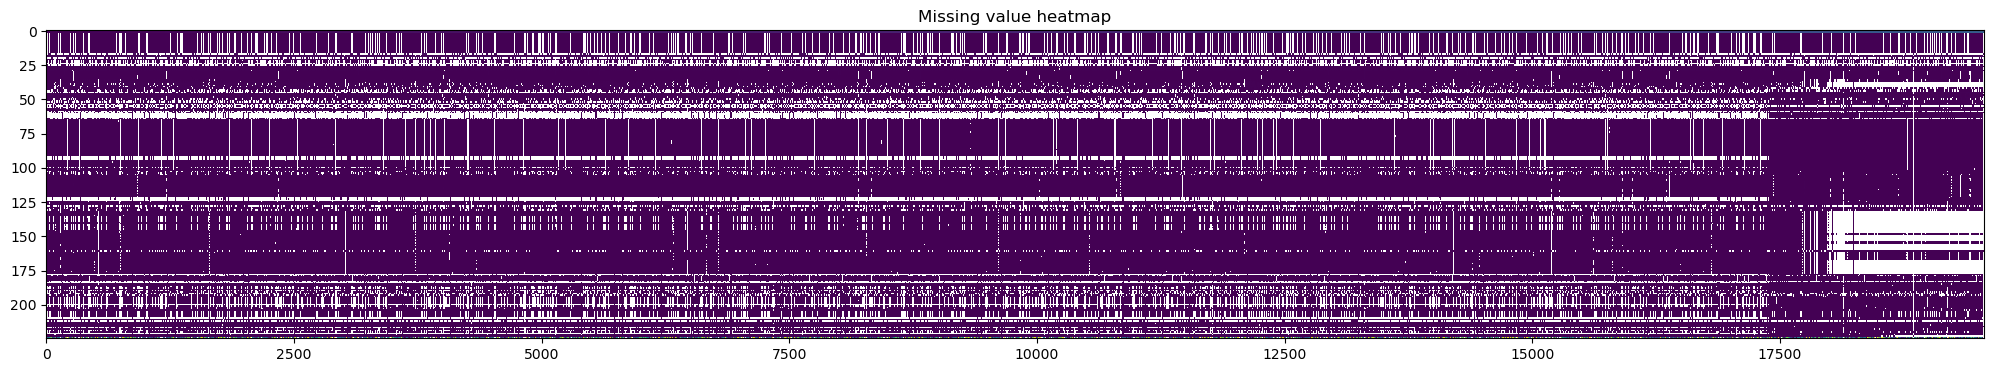

In [19]:
from sys import path
path.insert(0, '../')  # Ensure pympute is importable if installed locally
import numpy as np
import pylab as plt
import pandas as pd
from copy import deepcopy
from pympute import *
from pathlib import Path


data = df.copy()

# Assign imputation model for each column
model = {
    
}
# Visualize missing values
#data, hold_outs = do_holdout(data, 10)
fig, ax = plt.subplots(figsize=(25, 4))
ax.imshow(data.T.values, interpolation='none', aspect='auto')
plt.title("Missing value heatmap")
plt.show()

# # Impute
# device = 'cpu'  # change to 'cpu' if needed
# if device == 'cpu':
#     imp = Imputer(data, model, loss_f=None, fill_method='random', save_history=True)
# else:
#     imp = GImputer(data, model, loss_f=None, fill_method='random', save_history=True)

# imp.impute(10)

# # Plot loss
# imp.plot_loss_frame()

In [20]:
import streamlit as st


best_models,dfcomp = explore(data, device='cpu', n_try=5,n_iterate=10,model_list=None, st=st)

2025-07-01 18:59:44.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:59:44.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:59:44.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:59:44.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:59:44.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:59:44.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:59:44.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:59:44.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

MemoryError: Unable to allocate 2.20 GiB for an array with shape (17196, 17196) and data type float64